In [1]:
import glob
from os.path import join
from matplotlib import pyplot as plt
import cv2
import numpy as np
%matplotlib inline

In [2]:
datafolder = '/home/zj1992/windows/work2/datasets/humpbacks'

In [3]:
subfolder_list = glob.glob(join(datafolder,'*'))
indv_dict = {}
numpics = []
for subfolder in subfolder_list:
    pictures = glob.glob(join(subfolder,'*'))
    indv = subfolder.split('/')[-1]
    indv_dict[indv] = pictures
    numpics.append(len(pictures))
    
print(sum(numpics))

4541


<Container object of 1486 artists>

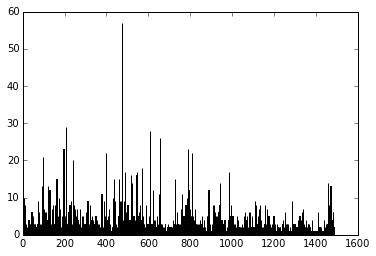

In [4]:
plt.bar(range(len(numpics)-1), numpics[:-1])

In [5]:
len([i for i in numpics if i == 1]) / float(len(numpics))
print(len(numpics[:-1]))

1486


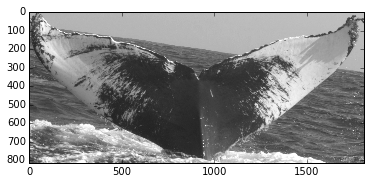

In [6]:
test_img = cv2.imread(indv_dict['10007'][0])
plt.imshow(test_img)

In [7]:
# Our initial rectangle is going to be the entire image, not much to do about that
# upper left (x,y), lower right (x,y)
rekt = (1,10,test_img.shape[1],test_img.shape[0])
print(rekt)
mask = np.zeros(test_img.shape[:2],np.uint8)
fgd_mod = np.zeros((1,65))
bgd_mod = np.zeros((1,65))
iterations = 2
cv2.grabCut(test_img,mask,rekt,bgd_mod,fgd_mod,iterations,cv2.GC_INIT_WITH_RECT)

(1, 10, 1808, 814)


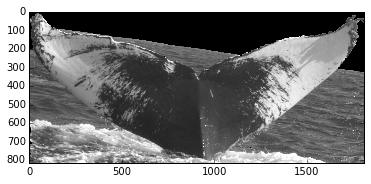

In [8]:
plt.gray()
collapsed_mask = np.where((mask==cv2.GC_BGD)|(mask==cv2.GC_PR_BGD),cv2.GC_BGD,cv2.GC_FGD).astype('uint8')
test_img = test_img*collapsed_mask[:,:,np.newaxis]
plt.imshow(test_img)

In [9]:
print(fgd_mod)

[[  3.17002045e-01   1.93841644e-01   2.97901774e-01   7.07601495e-02
    1.20494388e-01   9.53322115e+01   9.53322115e+01   9.53322115e+01
    1.39336330e+02   1.39336330e+02   1.39336330e+02   5.36682474e+01
    5.36682474e+01   5.36682474e+01   1.83698610e+02   1.83698610e+02
    1.83698610e+02   2.20928586e+02   2.20928586e+02   2.20928586e+02
    1.25441098e+02   1.25431098e+02   1.25431098e+02   1.25431098e+02
    1.25441098e+02   1.25431098e+02   1.25431098e+02   1.25431098e+02
    1.25441098e+02   2.29095417e+02   2.29085417e+02   2.29085417e+02
    2.29085417e+02   2.29095417e+02   2.29085417e+02   2.29085417e+02
    2.29085417e+02   2.29095417e+02   1.09968320e+02   1.09958320e+02
    1.09958320e+02   1.09958320e+02   1.09968320e+02   1.09958320e+02
    1.09958320e+02   1.09958320e+02   1.09968320e+02   6.99555357e+01
    6.99455357e+01   6.99455357e+01   6.99455357e+01   6.99555357e+01
    6.99455357e+01   6.99455357e+01   6.99455357e+01   6.99555357e+01
    2.52151287e+02  